<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/QC_Groover_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install imgaug==0.2.5
!pip install pylatexenc

References: https://www.youtube.com/watch?v=IvhqbvsSrjU

In [ ]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

mkdir: cannot create directory ‘/root/.qiskit’: File exists
[default]
circuit_drawer = mpl


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

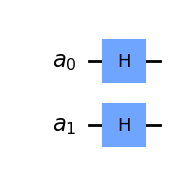

In [ ]:
qra = QuantumRegister(2, "a")
qrb = QuantumRegister(3, "b")

qc1 = QuantumCircuit(qra)
qc1.h(qra)
qc1.draw()

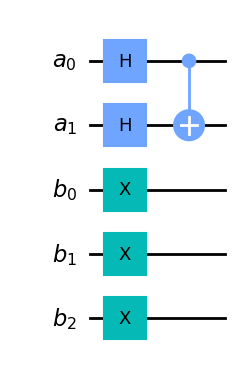

In [ ]:
qc2 = QuantumCircuit(qra)
qc2.add_register(qrb)   #including more register after creating the circuit
qc2.h(qra)              #applying all operation to all qubits in the register
qc2.cx(qra[0], qra[1])  #Using inndexes
qc2.x(qrb)
qc2.draw("mpl")

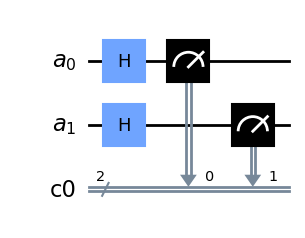

In [ ]:
cr = ClassicalRegister(2)

qc3 = QuantumCircuit(qra, cr)
qc3.h(qra)
qc3.measure(qra, cr)
qc3.draw("mpl")